In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Задати вершини довільного опуклого 8-кутника на площині. Зменшити його в 1,5 рази.

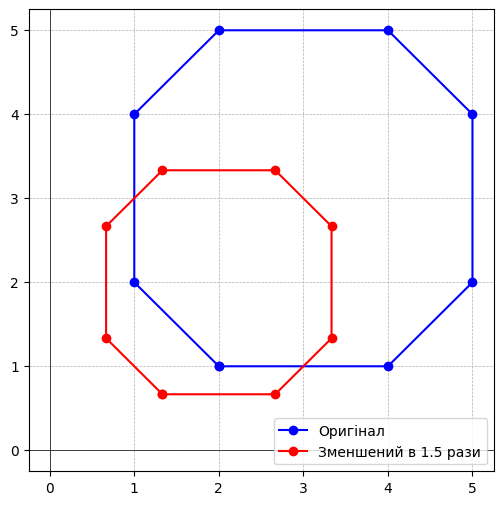

In [47]:
def scale_polygon(vertices, scale_factor):
    scale_matrix = np.array([[scale_factor, 0], [0, scale_factor]])
    return np.dot(vertices, scale_matrix.T)

def plot_polygons(original, transformed, labels):
    plt.figure(figsize=(6, 6))
    
    original = np.vstack([original, original[0]])
    transformed = np.vstack([transformed, transformed[0]])
    
    plt.plot(original[:, 0], original[:, 1], 'bo-', label=labels[0])
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label=labels[1])
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

polygon = np.array([
    [2, 1], [4, 1], [5, 2], [5, 4], [4, 5], [2, 5], [1, 4], [1, 2]
])

scale_factor = 1 / 1.5
scaled_polygon = scale_polygon(polygon, scale_factor)

plot_polygons(polygon, scaled_polygon, ["Оригінал", "Зменшений в 1.5 рази"] )


## Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат.

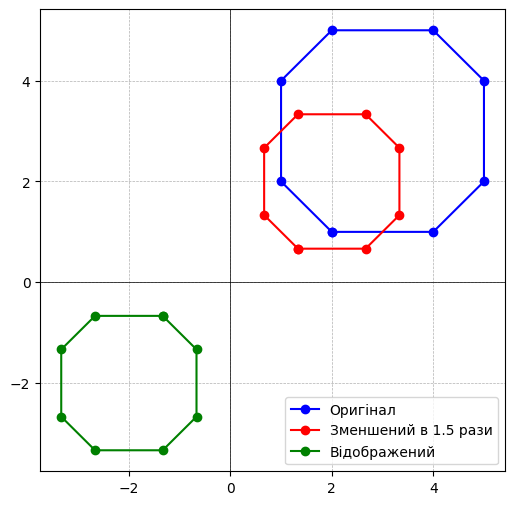

In [71]:
def reflect_polygon(vertices):
    reflect_matrix = np.array([[-1, 0], [0, -1]])
    return np.dot(vertices, reflect_matrix.T)

def plot_polygons(original, transformed, reflected, labels):
    plt.figure(figsize=(6, 6))
    
    original = np.vstack([original, original[0]])
    transformed = np.vstack([transformed, transformed[0]])
    reflected = np.vstack([reflected, reflected[0]])
    
    plt.plot(original[:, 0], original[:, 1], 'bo-', label=labels[0])
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label=labels[1])
    plt.plot(reflected[:, 0], reflected[:, 1], 'go-', label=labels[2])
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

polygon = np.array([
    [2, 1], [4, 1], [5, 2], [5, 4], [4, 5], [2, 5], [1, 4], [1, 2]
])

scale_factor = 1 / 1.5
scaled_polygon = scale_polygon(polygon, scale_factor)

reflected_polygon = reflect_polygon(scaled_polygon)

plot_polygons(polygon, scaled_polygon, reflected_polygon, ["Оригінал", "Зменшений в 1.5 рази", "Відображений"] )


## Задати похилу пряму двома точками на площині. Симетрично відобразити 8-кутник відносно даної прямої. Вказати перетворення, які для цього необхідні.

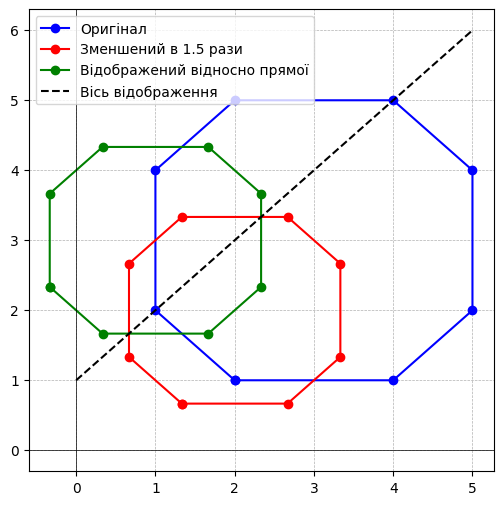

In [50]:
def reflect_across_line(vertices, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    
    angle = np.arctan2(y2 - y1, x2 - x1)
    
    translate_to_origin = np.array([[1, 0, -x1], [0, 1, -y1], [0, 0, 1]])
    
    rotate_to_x_axis = np.array([[np.cos(-angle), -np.sin(-angle), 0], 
                                 [np.sin(-angle), np.cos(-angle), 0], 
                                 [0, 0, 1]])
    
    reflect_x = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    
    rotate_back = np.array([[np.cos(angle), -np.sin(angle), 0], 
                            [np.sin(angle), np.cos(angle), 0], 
                            [0, 0, 1]])
    
    translate_back = np.array([[1, 0, x1], [0, 1, y1], [0, 0, 1]])
    
    transform_matrix = translate_back @ rotate_back @ reflect_x @ rotate_to_x_axis @ translate_to_origin
    
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    
    transformed_vertices = (transform_matrix @ vertices_homogeneous.T).T[:, :2]
    
    return transformed_vertices




def plot_polygons(original, transformed, reflected, line_points, labels):
    plt.figure(figsize=(6, 6))
    
    original = np.vstack([original, original[0]])
    transformed = np.vstack([transformed, transformed[0]])
    reflected = np.vstack([reflected, reflected[0]])
    
    plt.plot(original[:, 0], original[:, 1], 'bo-', label=labels[0])
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label=labels[1])
    plt.plot(reflected[:, 0], reflected[:, 1], 'go-', label=labels[2])
    
    plt.plot([line_points[0][0], line_points[1][0]], 
             [line_points[0][1], line_points[1][1]], 'k--', label="Вісь відображення")
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

polygon = np.array([
    [2, 1], [4, 1], [5, 2], [5, 4], [4, 5], [2, 5], [1, 4], [1, 2]
])

scale_factor = 1 / 1.5
scaled_polygon = scale_polygon(polygon, scale_factor)

reflected_polygon = reflect_polygon(scaled_polygon)

line_p1 = np.array([0, 1])
line_p2 = np.array([5, 6])
reflected_across_line = reflect_across_line(scaled_polygon, line_p1, line_p2)

plot_polygons(polygon, scaled_polygon, reflected_across_line, [line_p1, line_p2], 
              ["Оригінал", "Зменшений в 1.5 рази", "Відображений відносно прямої"] )


## Виконати пункти 2–4 для одного будь-якого графічного об’єкту, який подано в xlsx-файлі.

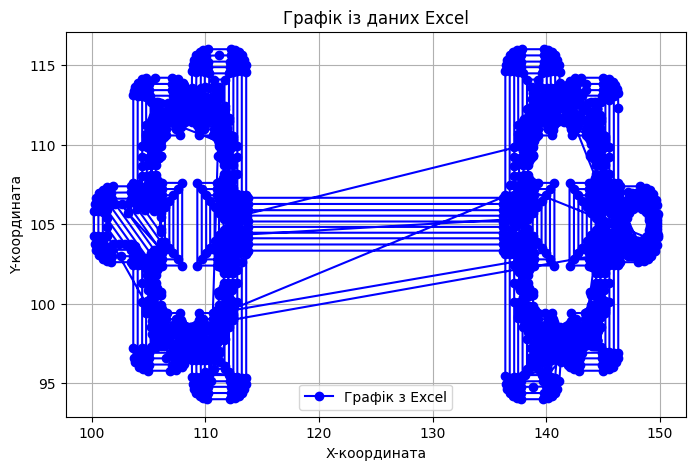

In [67]:
df = pd.read_excel("coordinates.xlsx", engine="openpyxl")

x = df["X"]
y = df["Y"]

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Графік з Excel")
plt.xlabel("X-координата")
plt.ylabel("Y-координата")
plt.title("Графік із даних Excel")
plt.legend()
plt.grid(True)

plt.show()

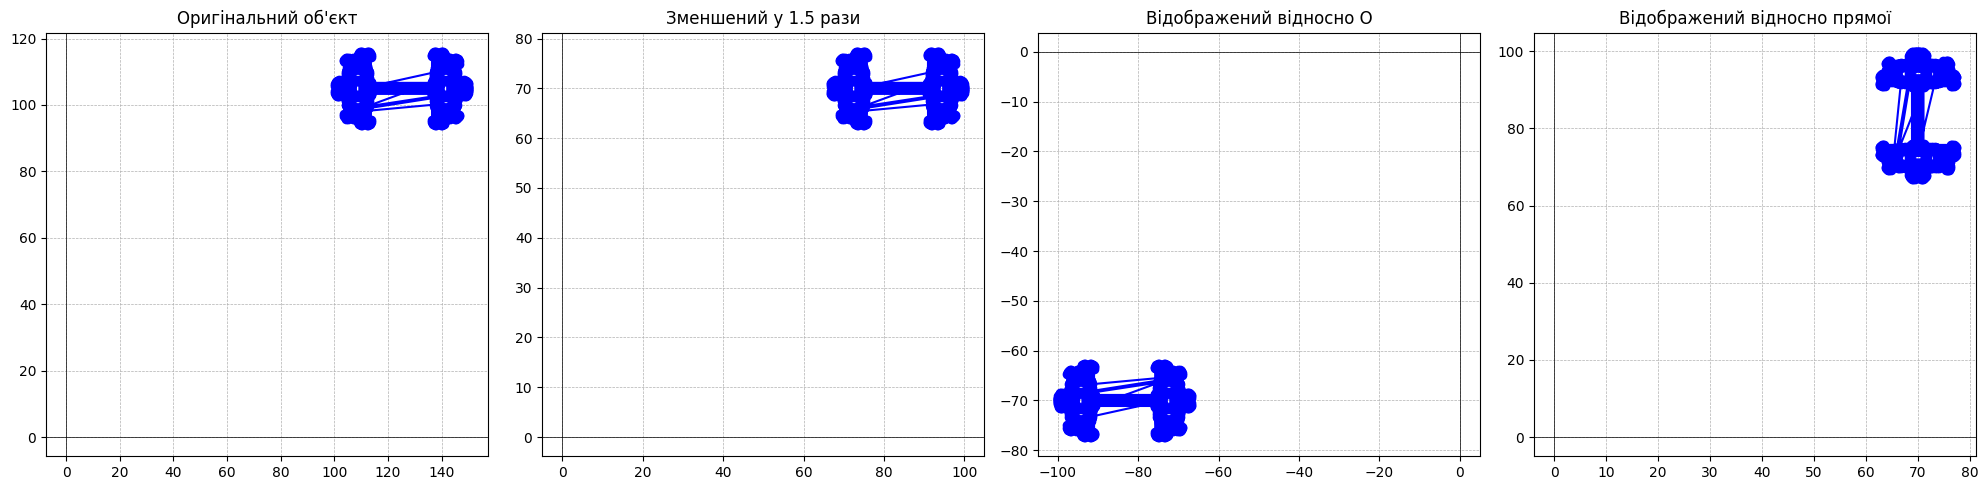

In [52]:
def plot_polygon(ax, vertices, title):
    vertices = np.vstack([vertices, vertices[0]]) 
    ax.plot(vertices[:, 0], vertices[:, 1], 'bo-')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(title)

def scale_polygon(vertices, scale_factor):
    return vertices * scale_factor

def reflect_polygon(vertices):
    return -vertices 

def reflect_across_line(vertices, p1, p2):
    return vertices[:, ::-1]  

file_path = "coordinates.xlsx"
df = pd.read_excel(file_path, sheet_name='Var_03', engine='openpyxl')
polygon = df[['X', 'Y']].to_numpy()

scale_factor = 1 / 1.5
scaled_polygon = scale_polygon(polygon, scale_factor)
reflected_polygon = reflect_polygon(scaled_polygon)
line_p1 = np.array([0, 1])
line_p2 = np.array([5, 6])
reflected_across_line = reflect_across_line(scaled_polygon, line_p1, line_p2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

plot_polygon(axes[0], polygon, "Оригінальний об'єкт")
plot_polygon(axes[1], scaled_polygon, "Зменшений у 1.5 рази")
plot_polygon(axes[2], reflected_polygon, "Відображений відносно O")
plot_polygon(axes[3], reflected_across_line, "Відображений відносно прямої")

plt.tight_layout()
plt.show()


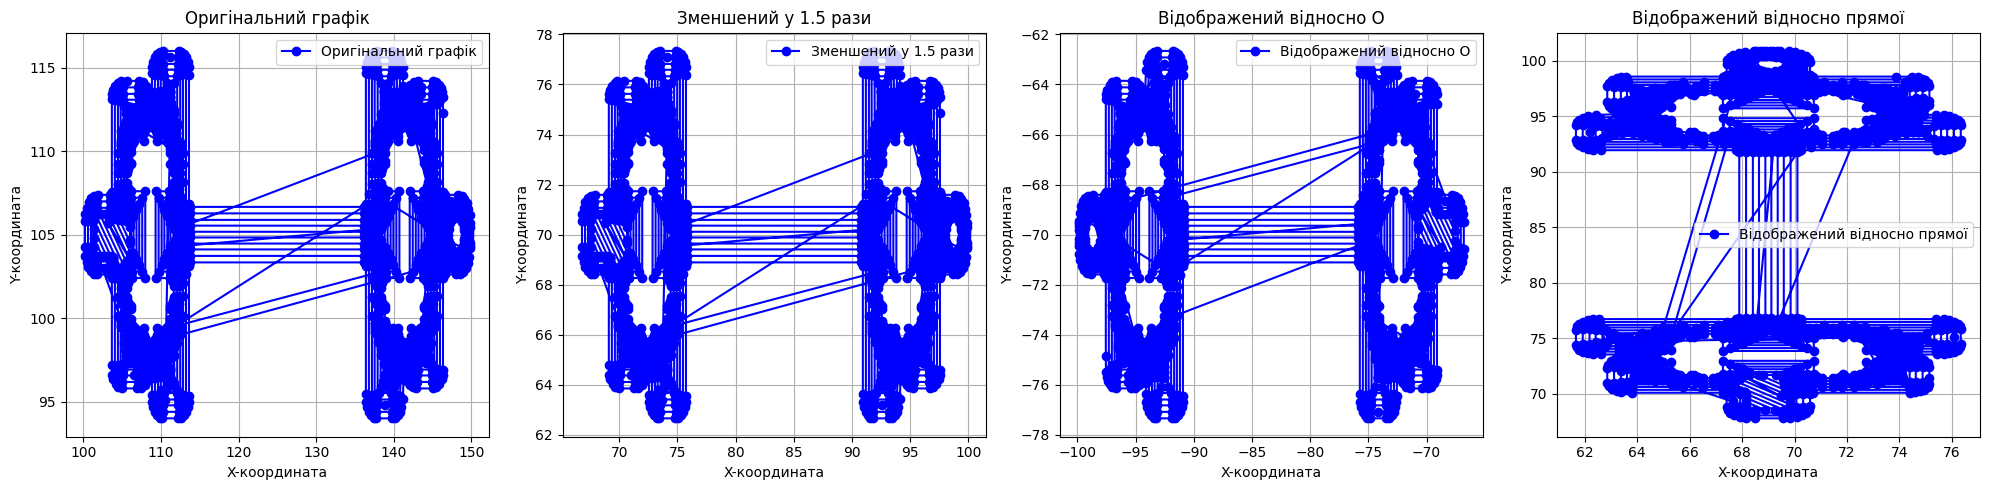

In [68]:
file_path = "coordinates.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
polygon = df[['X', 'Y']].to_numpy()

def plot_polygon(ax, vertices, title):
    ax.plot(vertices[:, 0], vertices[:, 1], marker="o", linestyle="-", color="b", label=title)
    ax.set_xlabel("X-координата")
    ax.set_ylabel("Y-координата")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
 

def reflect_across_line(vertices, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    
    A = y2 - y1
    B = x1 - x2
    C = -A * x1 - B * y1
    
    reflected_vertices = []
    for x, y in vertices:
        d = (A * x + B * y + C) / (A**2 + B**2)
        x_r = x - 2 * A * d
        y_r = y - 2 * B * d
        reflected_vertices.append((x_r, y_r))
    
    return np.array(reflected_vertices)



scale_factor = 1 / 1.5
scaled_polygon = scale_polygon(polygon, scale_factor)
reflected_polygon = reflect_polygon(scaled_polygon)
line_p1 = np.array([0, 1])
line_p2 = np.array([5, 6])
reflected_across_line = reflect_across_line(scaled_polygon, line_p1, line_p2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

plot_polygon(axes[0], polygon, "Оригінальний графік")
plot_polygon(axes[1], scaled_polygon, "Зменшений у 1.5 рази")
plot_polygon(axes[2], reflected_polygon, "Відображений відносно O")
plot_polygon(axes[3], reflected_across_line, "Відображений відносно прямої")

plt.tight_layout()
plt.show()
